1. IMPORTING NECESSARY LIBRARIES

In [163]:
import numpy as np #import numpy library for linear algebra
import pandas as pd #import pandas library for data processing
import matplotlib.pyplot as plt # for visualizations
import geopandas as gpd #for map visuals
%matplotlib inline
import seaborn as sns
import sklearn

In [116]:
df = pd.read_csv('/Users/bs/Downloads/global_food_prices.csv') #reading csv file into memory

/var/folders/hy/q5cn6v0s4pj6k45kpnqcjzg00000gn/T/ipykernel_1501/3673086338.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/bs/Downloads/global_food_prices.csv') #reading csv file into memory


 2. MEMORY REDUCTION FOR BETTER PERFORMANCE

In [117]:
 # MEMORY REDUCTION FOR BETTER PERFORMANCE
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


3. READING DATA FOR ANALYSIS

In [118]:
df.info #info on the dataset

<bound method DataFrame.info of          adm0_id    adm0_name  adm1_id   adm1_name  mkt_id    mkt_name  cm_id  \
0            1.0  Afghanistan      272  Badakhshan     266    Fayzabad     55   
1            1.0  Afghanistan      272  Badakhshan     266    Fayzabad     55   
2            1.0  Afghanistan      272  Badakhshan     266    Fayzabad     55   
3            1.0  Afghanistan      272  Badakhshan     266    Fayzabad     55   
4            1.0  Afghanistan      272  Badakhshan     266    Fayzabad     55   
...          ...          ...      ...         ...     ...         ...    ...   
2050633    271.0     Zimbabwe     3444    Midlands    5594  Mbilashaba    432   
2050634    271.0     Zimbabwe     3444    Midlands    5594  Mbilashaba    539   
2050635    271.0     Zimbabwe     3444    Midlands    5594  Mbilashaba    540   
2050636    271.0     Zimbabwe     3444    Midlands    5594  Mbilashaba    541   
2050637    271.0     Zimbabwe     3444    Midlands    5594  Mbilashaba    887

In [119]:
%time df = pd.read_csv("/Users/bs/Downloads/global_food_prices.csv",encoding="ISO-8859-1")
print(df.shape)

<timed exec>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3.44 s, sys: 720 ms, total: 4.16 s
Wall time: 4.25 s
(2050638, 18)


In [120]:
# improving performance by reducing memory usage to work comfortably on the data.

reduce_mem_usage(df)

Mem. usage decreased to 172.10 Mb (38.9% reduction)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.000000,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.000000,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.000000,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.000000,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.333298,NaN
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.500000,NaN
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.000000,NaN
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.500000,NaN


In [126]:
df.columns #Getting Column names from the dataset

Index(['country_id', 'country', 'city_id', 'city', 'market_id', 'market_name',
       'product_id', 'product', 'currency_id', 'currency', 'category_id',
       'category', 'measure_qty', 'measure_unit', 'month', 'year', 'price',
       'supply_source'],
      dtype='object')

3. Renaming Multiple columns

In [122]:
#Renaming Columns in the dataset for data clarity
df.rename({'adm0_id': 'country_id',
           'adm0_name': 'country', 
           'adm1_id': 'city_id',
           'adm1_name': 'city',
           'mkt_id': 'market_id',
           'mkt_name': 'market_name',
           'cm_id': 'product_id',
           'cm_name': 'product',
           'cur_id': 'currency_id',
           'cur_name': 'currency',
           'pt_id': 'category_id',
           'pt_name': 'category',
           'um_id': 'measure_qty',
           'um_name': 'measure_unit',
           'mp_month' : 'month',
           'mp_year':'year',
           'mp_price':'price',
           'mp_commoditysource': 'supply_source'}, 
          axis = "columns", inplace = True)

In [111]:
#showing names of columns after renaming the dataset
df.columns

Index(['country_id', 'country', 'city_id', 'city', 'market_id', 'market_name',
       'product_id', 'product', 'currency_id', 'currency', 'category_id',
       'category', 'measure_qty', 'measure_unit', 'month', 'year', 'price',
       'supply_source'],
      dtype='object')

In [127]:
# Convert columns to appropriate data types for easy calculation
df['price'] = df['price'].astype(float)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

Calculations and comparison based on prices.

In [132]:
# Calculate average price per commodity per year
avg_price_per_year = df.groupby(['year', 'product'])['price'].mean().reset_index()
print(avg_price_per_year)

      year                   product         price
0     1990           Millet - Retail     65.862069
1     1990  Rice (imported) - Retail    201.388889
2     1990          Sorghum - Retail     58.695652
3     1991           Millet - Retail     74.000000
4     1991  Rice (imported) - Retail    188.970588
...    ...                       ...           ...
6975  2021     Yam (yellow) - Retail    343.481291
6976  2021              Yam - Retail    365.303192
6977  2021           Yam - Wholesale  19310.901651
6978  2021           Yogurt - Retail    840.617307
6979  2021         Zucchini - Retail      5.812096

[6980 rows x 3 columns]


In [134]:
# Calculate the total monthly price across all commodities
total_monthly_price = df.groupby(['year', 'month'])['price'].sum().reset_index()
print(total_monthly_price)

     year  month         price
0    1990      1  1.141000e+03
1    1990      2  1.139000e+03
2    1990      3  1.150000e+03
3    1990      4  1.177000e+03
4    1990      5  1.009000e+03
..    ...    ...           ...
375  2021      4  1.587869e+08
376  2021      5  1.344415e+08
377  2021      6  1.107751e+08
378  2021      7  2.874350e+07
379  2021      8  8.779262e+06

[380 rows x 3 columns]


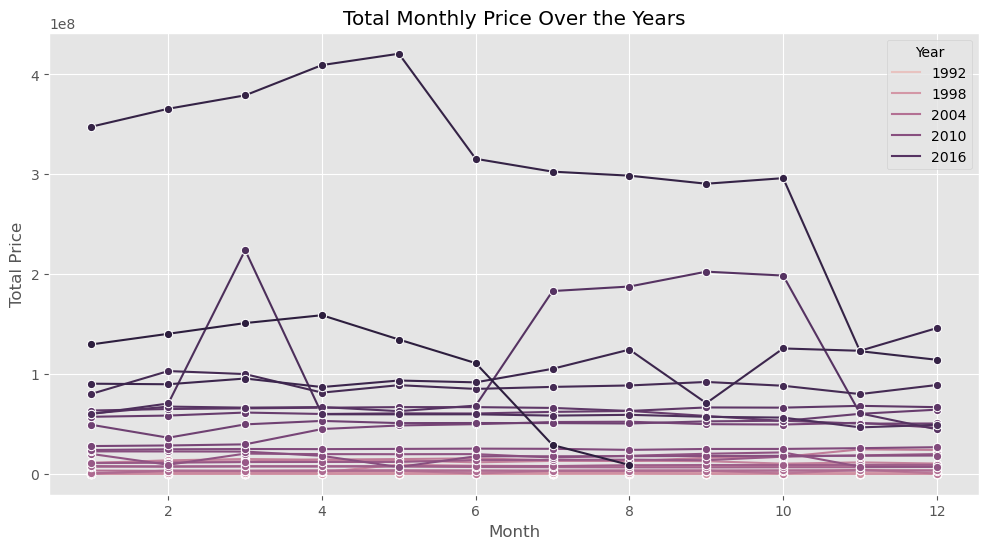

In [162]:
# Create a line plot of total monthly price over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_monthly_price, x='month', y='price', hue='year', marker='o')
plt.title('Total Monthly Price Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.legend(title='Year')
plt.grid(True)
plt.show()

Calculation and comparison of products across years

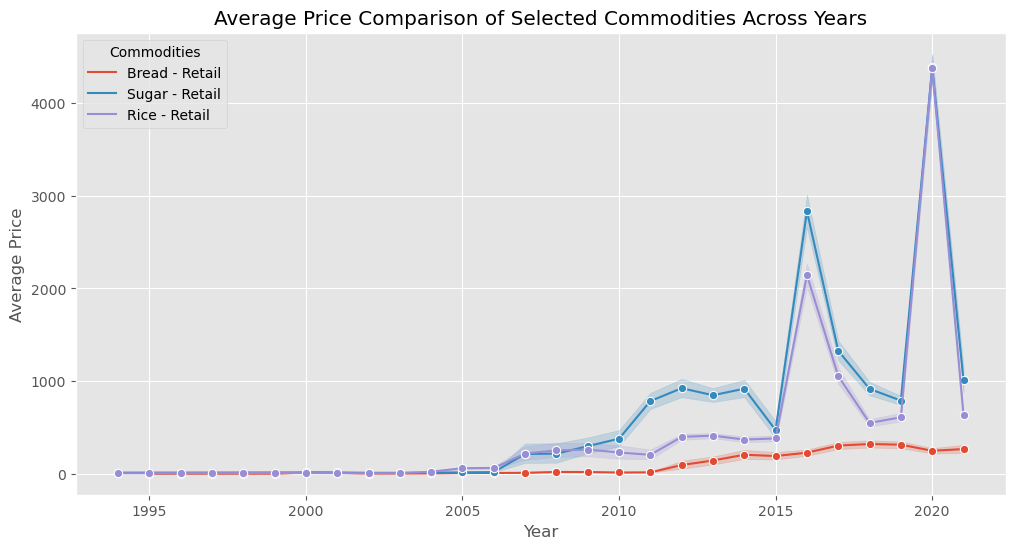

In [141]:
# Compare average prices of specific commodities across years
selected_commodities = ['Bread - Retail', 'Rice - Retail', 'Sugar - Retail']

selected_data = df[df['product'].isin(selected_commodities)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_data, x='year', y='price', hue='product', marker='o')
plt.title('Average Price Comparison of Selected Commodities Across Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Commodities')
plt.grid(True)
plt.show()

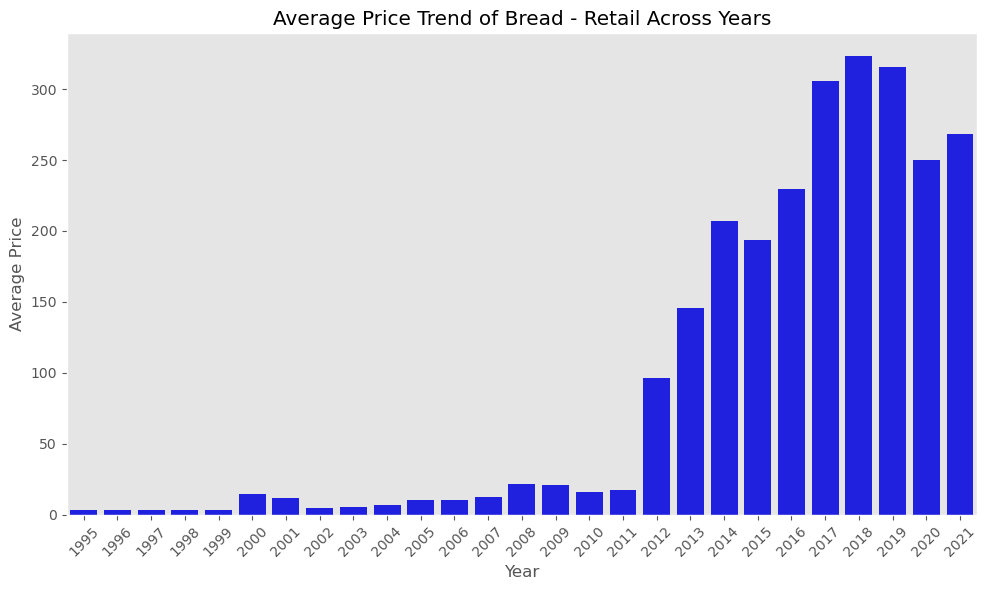

In [143]:
# Compare monthly price trends of bread across years

# Choose a specific commodity for comparison
selected_commodity = 'Bread - Retail'

# Filter the data for the selected commodity
selected_commodity_data = df[df['product'] == selected_commodity]

# Calculate average price per year
avg_price_per_year = selected_commodity_data.groupby('year')['price'].mean().reset_index()

# Create a bar plot to compare the price trend of the selected commodity across years
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_year, x='year', y='price', color='blue')
plt.title(f'Average Price Trend of {selected_commodity} Across Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


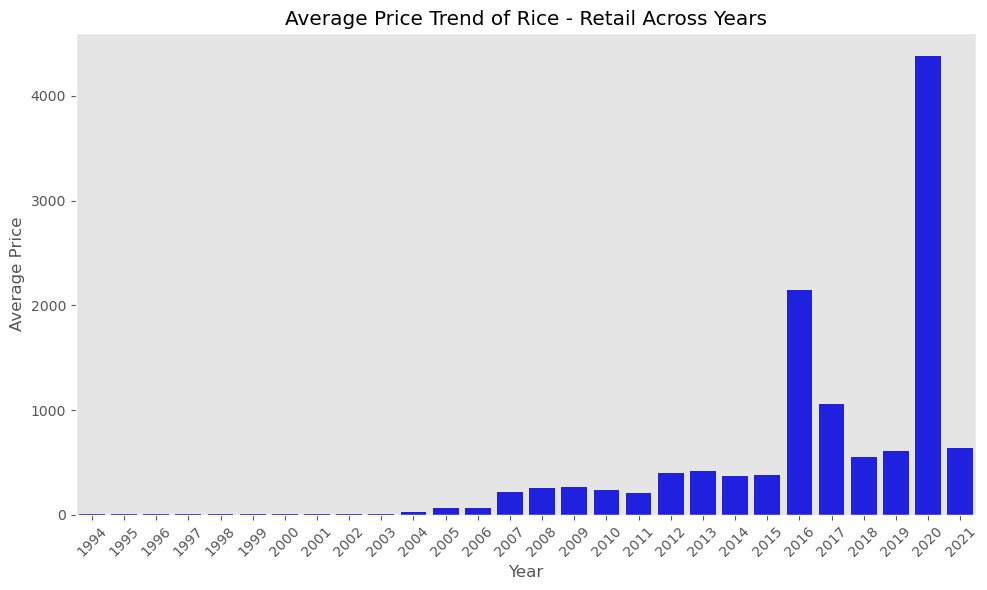

In [144]:
# Compare monthly price trends of rice across years

# Choose a specific commodity for comparison
selected_commodity = 'Rice - Retail'

# Filter the data for the selected commodity
selected_commodity_data = df[df['product'] == selected_commodity]

# Calculate average price per year
avg_price_per_year = selected_commodity_data.groupby('year')['price'].mean().reset_index()

# Create a bar plot to compare the price trend of the selected commodity across years
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_year, x='year', y='price', color='blue')
plt.title(f'Average Price Trend of {selected_commodity} Across Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

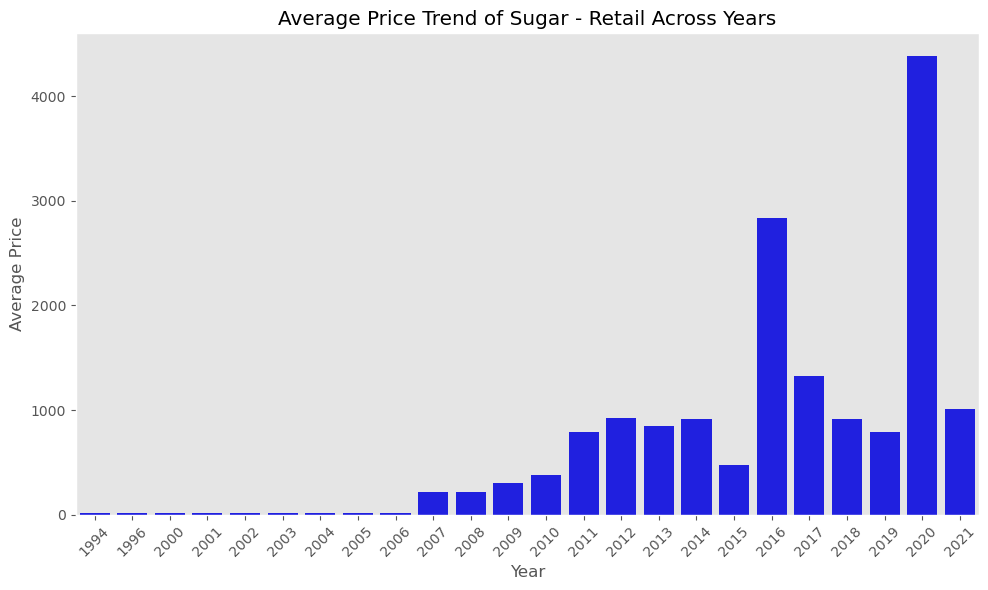

In [145]:
# Compare monthly price trends of sugar across years

# Choose a specific commodity for comparison
selected_commodity = 'Sugar - Retail'

# Filter the data for the selected commodity
selected_commodity_data = df[df['product'] == selected_commodity]

# Calculate average price per year
avg_price_per_year = selected_commodity_data.groupby('year')['price'].mean().reset_index()

# Create a bar plot to compare the price trend of the selected commodity across years
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_year, x='year', y='price', color='blue')
plt.title(f'Average Price Trend of {selected_commodity} Across Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4. Country Analysis.

In [112]:
# Number of rows for each country

country_unique, country_freq = np.unique(df['country'], return_counts = True)
listrows = []
for i in range(country_unique.shape[0]):
    
    print(country_unique[i], ': ', country_freq[i])
    listrows.append( [country_unique[i], country_freq[i]])

Afghanistan :  15427
Algeria :  1793
Angola :  1272
Argentina :  990
Armenia :  20600
Azerbaijan :  125
Bangladesh :  7758
Bassas da India :  137093
Belarus :  444
Benin :  39530
Bhutan :  346
Bolivia :  17424
Burkina Faso :  35437
Burundi :  60921
Cambodia :  21871
Cameroon :  22476
Cape Verde :  2135
Central African Republic :  12720
Chad :  18896
China :  1312
Colombia :  26540
Congo :  5257
Costa Rica :  297
Cote d'Ivoire :  7888
Democratic Republic of the Congo :  47052
Djibouti :  6006
Dominican Republic :  2392
Ecuador :  4075
Egypt :  2304
El Salvador :  7653
Eritrea :  100
Ethiopia :  24627
Gabon :  504
Gambia :  56971
Georgia :  80
Ghana :  25414
Guatemala :  3907
Guinea :  11810
Guinea-Bissau :  19796
Haiti :  13376
Honduras :  1629
Indonesia :  72437
Iran  (Islamic Republic of) :  480
Iraq :  25578
Japan :  1372
Jordan :  23843
Kazakhstan :  3365
Kenya :  8884
Kyrgyzstan :  61188
Lao People's Democratic Republic :  29902
Lebanon :  42784
Lesotho :  9364
Liberia :  12302
Lib

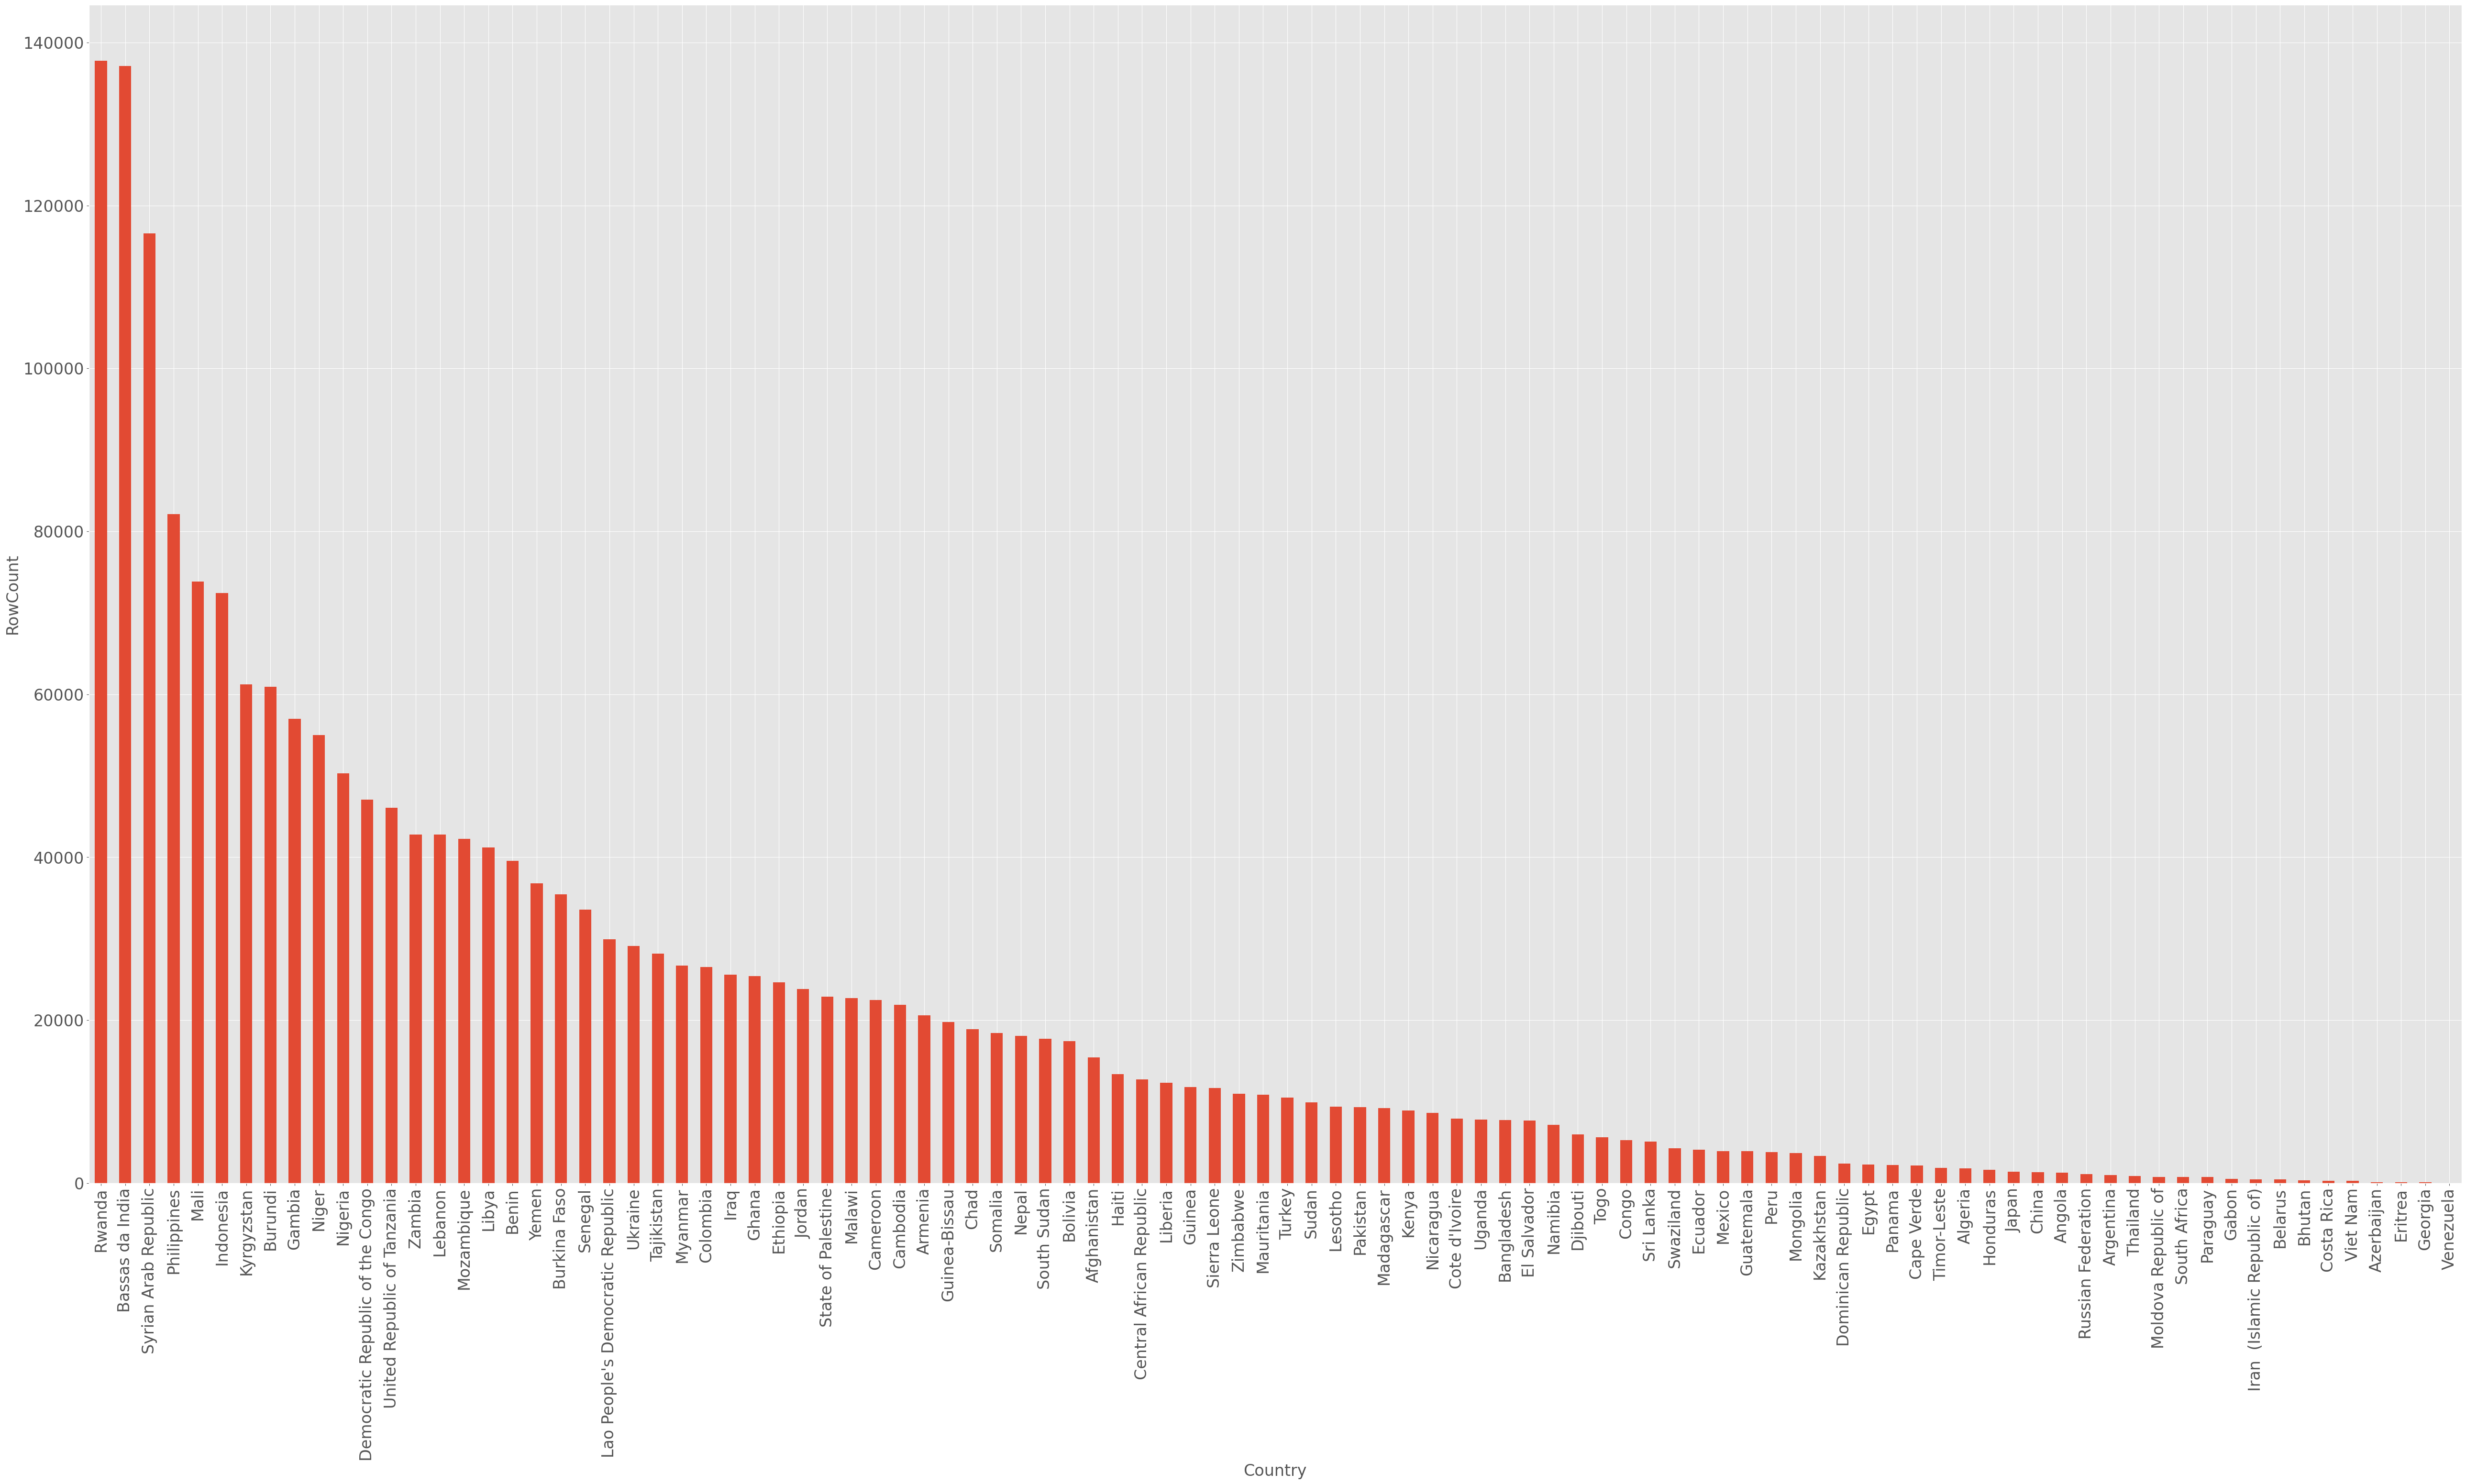

In [94]:
#Plotting graph of volume of data by country

df = pd.DataFrame(listrows, columns = ['Country', 'RowCount'])
df= df.sort_values(by=['RowCount'],ascending=False)
ax= df.plot(kind='bar', y = 'RowCount',x ='Country',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("Country",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

In [148]:
# Calculate average price per commodity per country
avg_price_per_country = selected_commodity_data.groupby(['country', 'year'])['price'].mean().reset_index()
print(avg_price_per_country)

         country  year       price
0    Afghanistan  2020   49.907231
1    Afghanistan  2021   50.609805
2        Algeria  2015   95.055556
3        Algeria  2016   97.409091
4      Argentina  2016   14.077778
..           ...   ...         ...
370        Yemen  2019  312.445652
371        Yemen  2020  410.405797
372        Yemen  2021  456.652174
373     Zimbabwe  2020  119.239606
374     Zimbabwe  2021  118.197865

[375 rows x 3 columns]


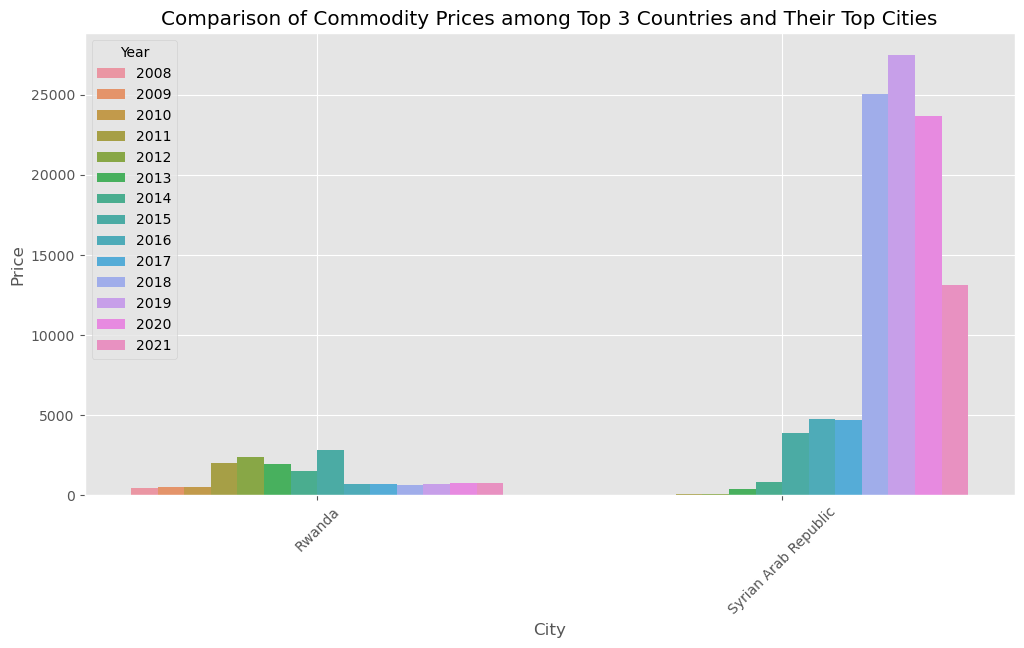

In [171]:
# Get the top 3 countries with the highest number of cities
top_countries = df['country'].value_counts().nlargest(3).index
data_top_countries = df[df['country'].isin(top_countries)]

# Get the top 3 cities for each of the top countries
top_cities_per_country = data_top_countries.groupby('country')['city'].value_counts().groupby('country').head(3).index
data_top_cities = data_top_countries[data_top_countries.set_index(['country', 'city']).index.isin(top_cities_per_country)]

# Create a bar chart comparing commodity prices among the top 3 countries and their top cities
plt.figure(figsize=(12, 6))
sns.barplot(data=data_top_cities, x='country', y='price', hue='year', errorbar=None)
plt.title('Comparison of Commodity Prices among Top 3 Countries and Their Top Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



In [154]:
# Calculate the top countries with the highest average prices for Sugar-retail
top_countries = avg_price_per_country.groupby('country')['price'].mean().nlargest(5).index
print(top_countries)

Index(['Iran  (Islamic Republic of)', 'Indonesia', 'Sierra Leone',
       'Lao People's Democratic Republic', 'Guinea'],
      dtype='object', name='country')


In [156]:
# Filter data for the top countries
top_countries_data = avg_price_per_country[avg_price_per_country['country'].isin(top_countries)]
print(top_countries_data)

                              country  year          price
123                            Guinea  2011    9285.714286
124                            Guinea  2012    8700.000000
125                            Guinea  2013    7052.631579
126                            Guinea  2014    6781.250000
127                            Guinea  2015    6541.666667
128                            Guinea  2016    8112.500000
129                            Guinea  2017    8989.959342
130                            Guinea  2018    8204.422222
131                            Guinea  2019    7765.276316
132                            Guinea  2020    8293.507463
133                            Guinea  2021    9250.963855
148                         Indonesia  2007    6568.395833
149                         Indonesia  2008    6536.833333
150                         Indonesia  2009    8573.354045
151                         Indonesia  2010   10856.333333
152                         Indonesia  2011   10816.2500

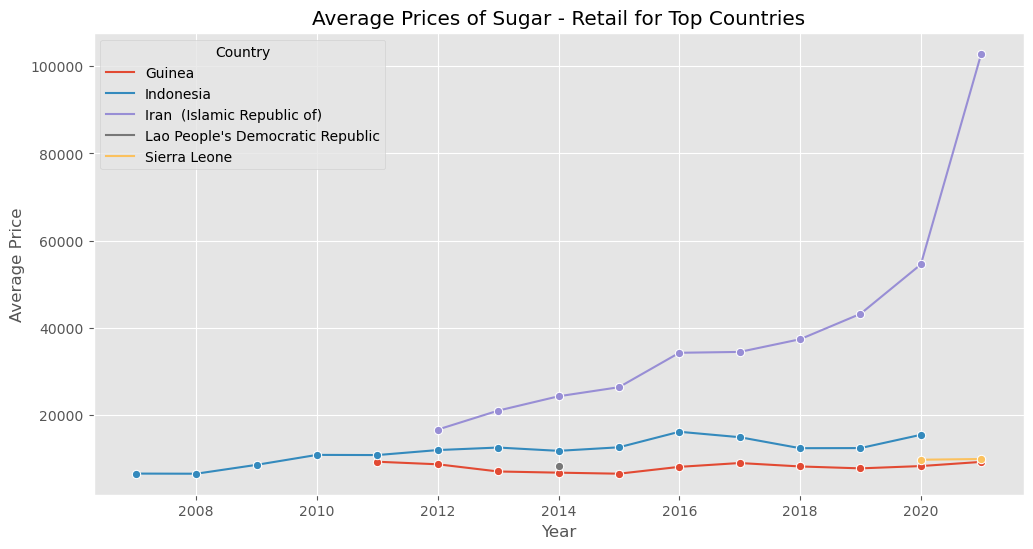

In [157]:
# Create a line plot to visualize the average prices of Sugar for the top countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_countries_data, x='year', y='price', hue='country', marker='o')
plt.title(f'Average Prices of {selected_commodity} for Top Countries')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Country')
plt.grid(True)
plt.show()